In [15]:
# BIBLIOTECAS NECESSÁRIAS AO MODELO DE CLASSIFICAÇÃO
import matplotlib.pyplot as plt
import matplotlib as mpl    
from sklearn.datasets import fetch_openml

# Baixando o conjunto de dados

In [6]:
# Dataset mnist
mnist= fetch_openml('mnist_784',version=1,as_frame=False)
mnist.keys()
display('data','target', 'feature_names', 'DESCR', 'details', 
            'categories', 'url')

'data'

'target'

'feature_names'

'DESCR'

'details'

'categories'

'url'

In [8]:
# conferir os arrays
x, y = mnist['data'], mnist['target']
x.shape

(70000, 784)

In [9]:
y.shape

(70000,)

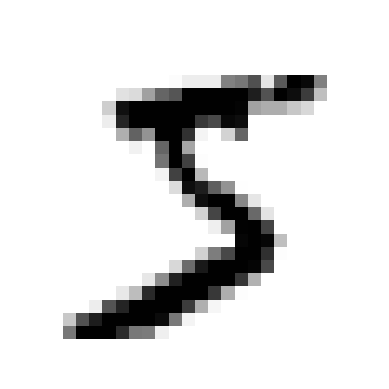

In [17]:
# verificando os imagens
some_digit = x[0]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap ="binary" )
plt.axis("off")
plt.show()